In [9]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [10]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]
image = cv2.imread(filename)

# Convert BGR (OpenCV default) to RGB for correct color display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(f"Uploaded image shape: {image_rgb.shape}")  # (height, width, 3)


Saving 1266440.jpg to 1266440.jpg
Uploaded image shape: (1943, 4133, 3)


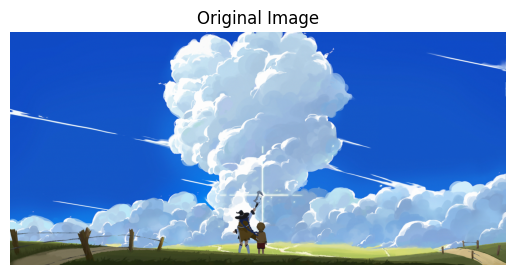

In [11]:
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()


In [12]:
# Flatten the image to shape (num_pixels, 3)
pixels = image_rgb.reshape(-1, 3)

print(f"Flattened shape: {pixels.shape}")
print("Each row is a pixel with R, G, B values.")


Flattened shape: (8030419, 3)
Each row is a pixel with R, G, B values.


In [13]:
# Apply K-Means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pixels)

# Get the cluster labels for each pixel
labels = kmeans.labels_

print(f"Unique clusters found: {np.unique(labels)}")


Unique clusters found: [0 1]


In [14]:
# Define mask color (white)
mask_color = np.array([255, 255, 255])

# Choose which cluster to mask (0 or 1)
cluster_to_mask = 0

# Create a copy of pixel data
segmented_pixels = np.copy(pixels)

# Apply the mask to the chosen cluster
segmented_pixels[labels == cluster_to_mask] = mask_color


In [15]:
# Reshape to original image dimensions
segmented_image = segmented_pixels.reshape(image_rgb.shape)


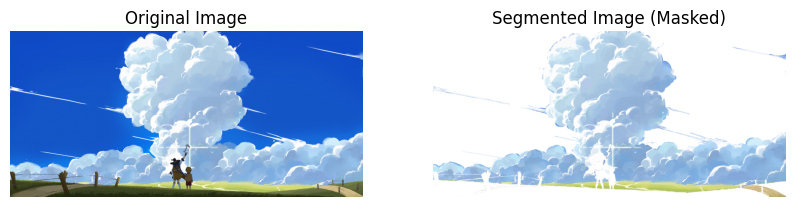

In [16]:
plt.figure(figsize=(10,5))

# Original Image
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

# Segmented Image
plt.subplot(1,2,2)
plt.imshow(segmented_image.astype(np.uint8))
plt.title("Segmented Image (Masked)")
plt.axis("off")

plt.show()
